<font size=6><bold><center>Social Computing</center></bold></font>

<font size=3><center>Group 9</center></font>

<font size=3><center>梁昊辉 1930026077</center></font>

# Import packages we need

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

In [2]:
# NumPy: A Python library used for convert list to arrays
import numpy as np

# pd: Package for data analysis and manipulation tools
import pandas as pd

# Provides Perl-style regular expression patterns. The re module brings full regular expression capabilities to the Python language
import re

# The string package mainly contains processing functions for strings
import string

# plt: Module that import names for the opencv-python library to solve computer vision problems.
import matplotlib.pyplot as plt

# seaborn: A statistical charting library based on the unified data structure of matplotlib and Pandas
import seaborn as sns

import keras
from keras import backend as K

# The packages used to measure the prediction result
from sklearn import metrics

#train_test_split : splitting dataset into two subsets: for training data and for testing data.
from sklearn.model_selection import train_test_split

# LabelEncoder: The function used to encode the label
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

# to_categorical: Convert the label to the form of 0nehot
from tensorflow.keras.utils import to_categorical

# Tokenizer: Classes for vectorizing text, or converting text to sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# pad_sequences: Convert the sequence to a new sequence of the same length after padding.
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adam: Optimizer for Deep Learning Models
from tensorflow.keras.optimizers import Adam

# Sequenial: Used to build a model for stacking layers
from tensorflow.keras.models import Sequential

# EarlyStopping: Used to specify which specific operation to perform at the beginning and end of each epoch
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Import many layers
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input, concatenate, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Bidirectional
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU

# Ignore the warnings we meet
import warnings
warnings.filterwarnings("ignore")

%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

# Set the default plot style
sns.set()
%config InlineBackend.figure_format = 'retina'

# Import the dataset and Some EDA
## Import the dataset

In [3]:
# Read dataset & Preprocess text
df_train = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/train.txt',
                       names = ['Text', 'Emotion'],
                       sep = ';',
                       encoding = 'utf-8')
df_val = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/val.txt',
                     names = ['Text', 'Emotion'],
                     sep = ';',
                     encoding = 'utf-8')
df_test = pd.read_csv('/kaggle/input/emotions-dataset-for-nlp/test.txt',
                      names = ['Text', 'Emotion'],
                      sep = ';',
                      encoding = 'utf-8')

# Print the shape of each dataset
print(df_train.shape, df_test.shape, df_val.shape)

(16000, 2) (2000, 2) (2000, 2)


In [4]:
df_train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## Exploratory Data Analysis

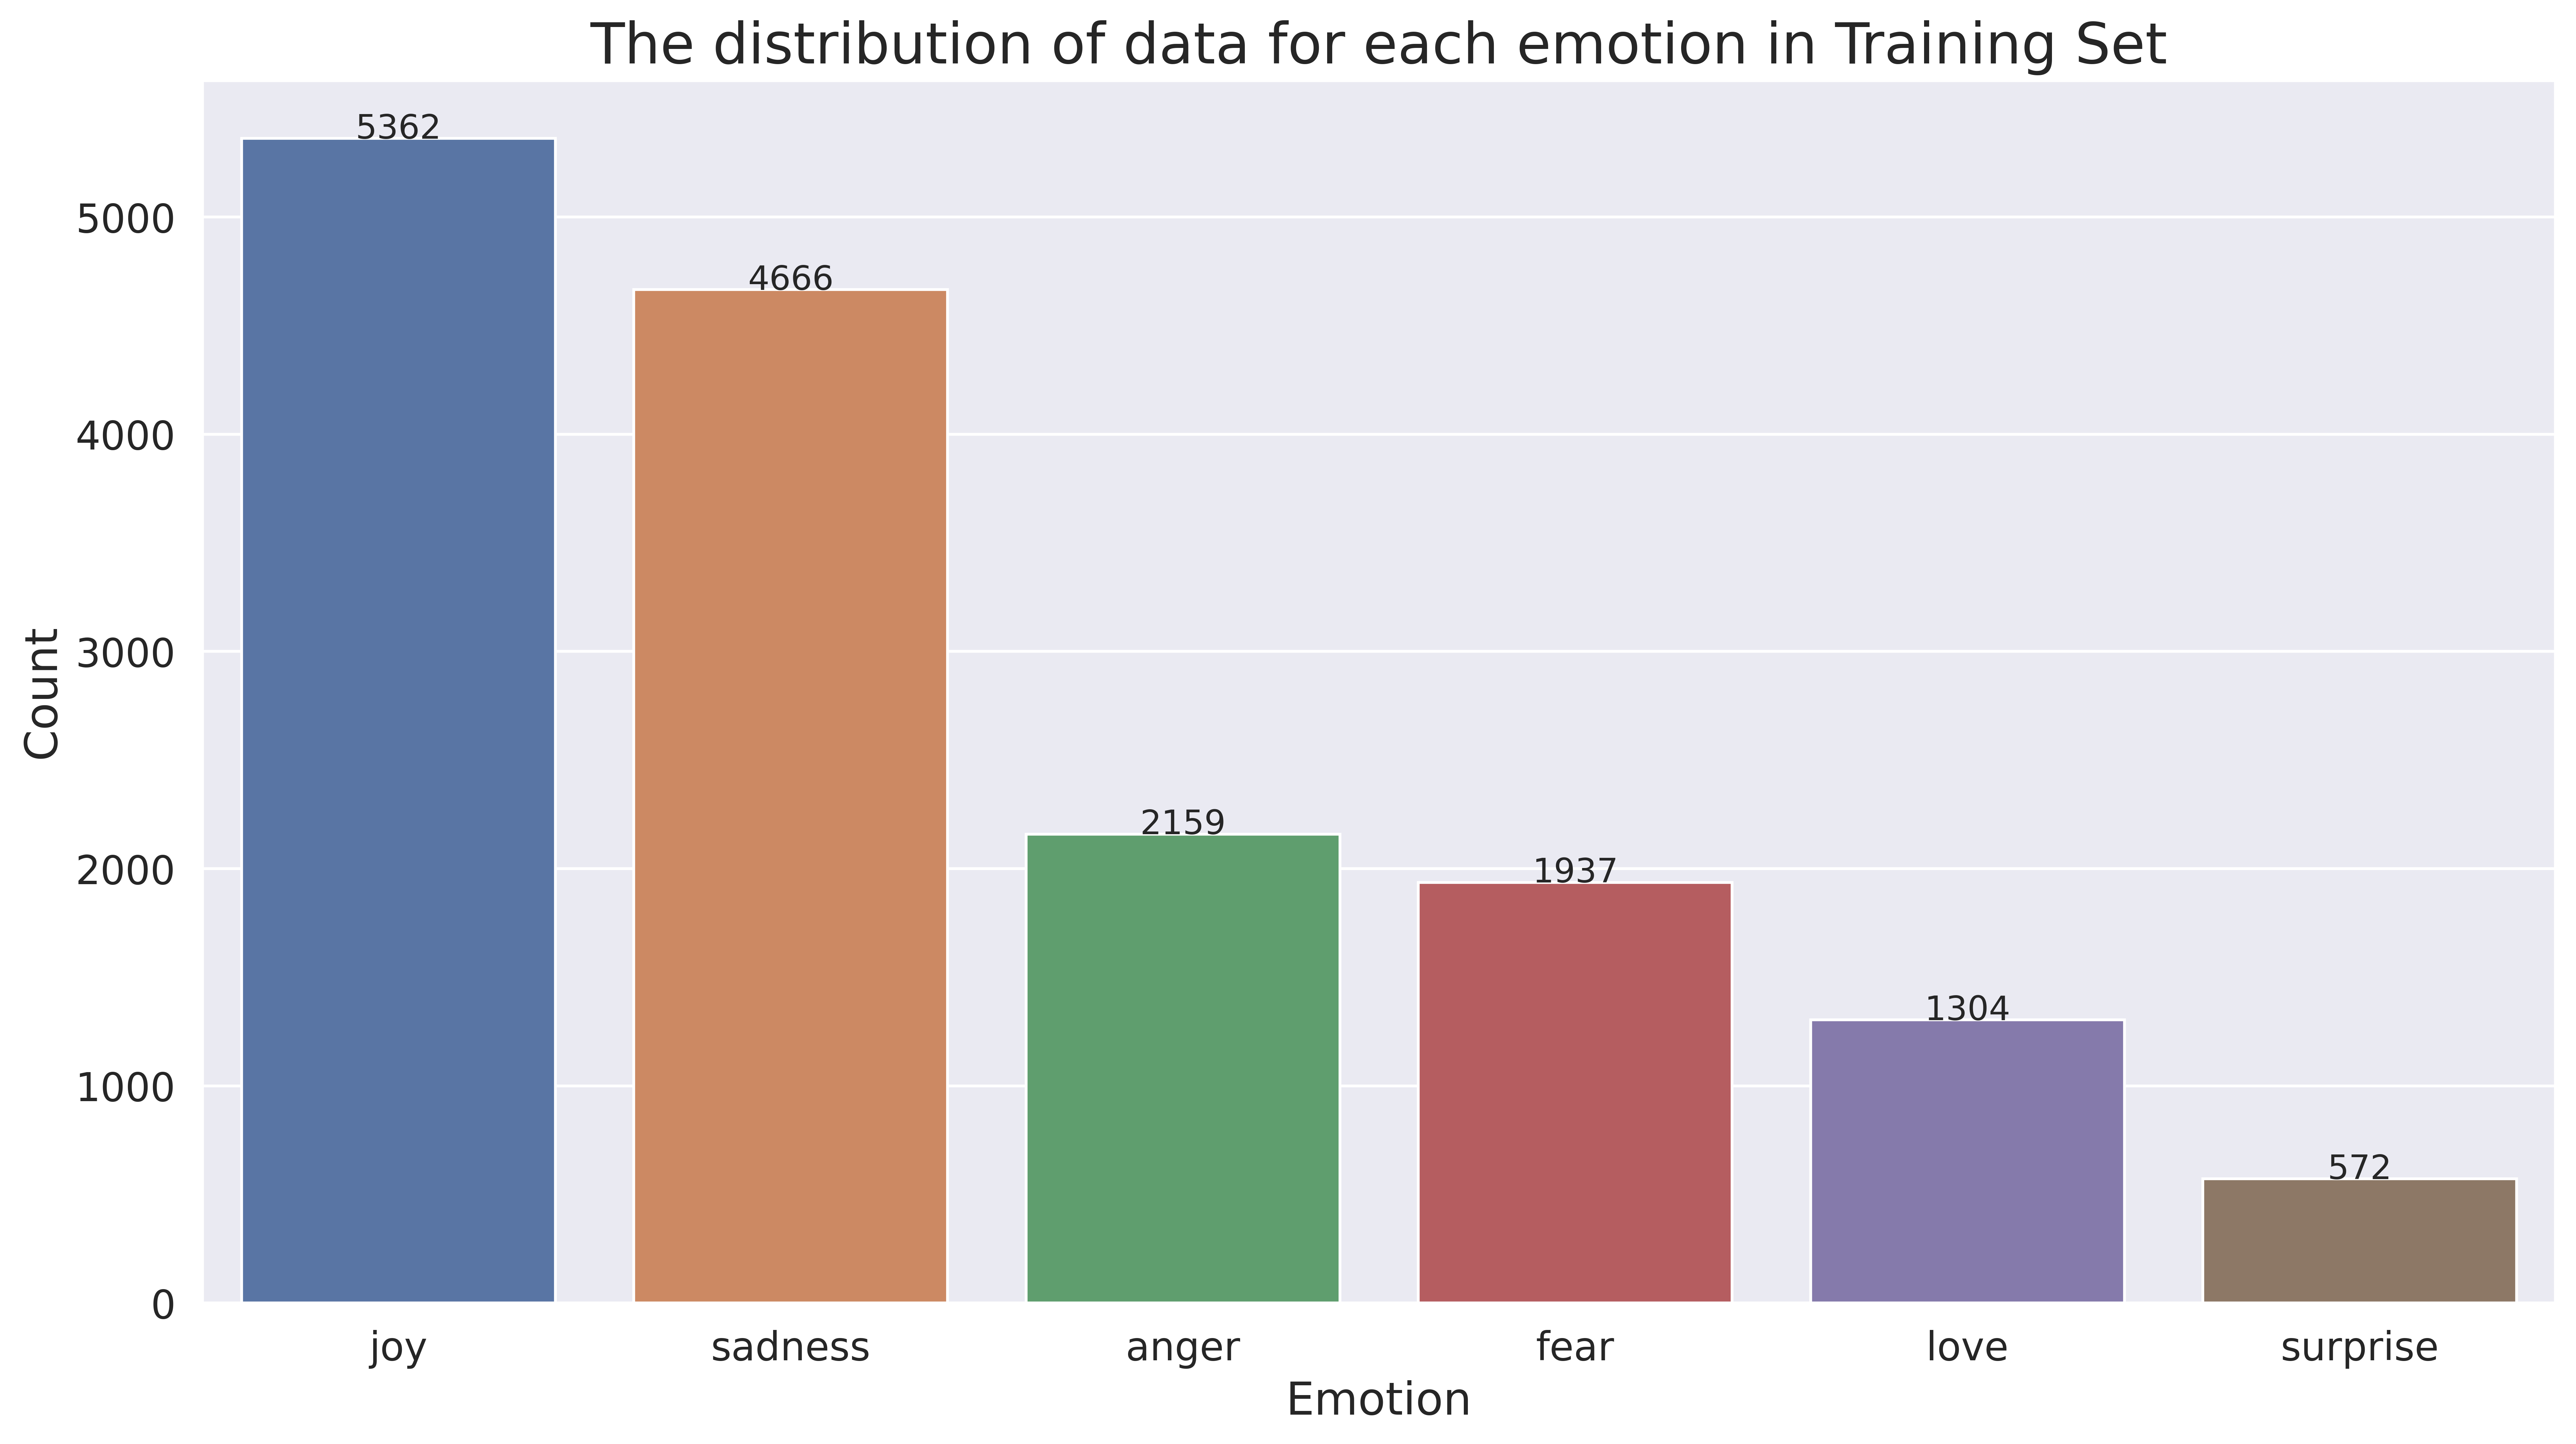

In [5]:
# Count the number of each emotion
data = [coun for coun in df_train['Emotion'].value_counts().items()]
df = pd.DataFrame(data, columns = ['Emotion', 'Count'])

# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi = 300)

# Draw a barchart to show the data
g = sns.barplot(x = 'Emotion', y = 'Count', data = df, orient = 'v')

# Show the number in the graph
for index, row in df.iterrows():
    g.text(row.name, row.Count, row.Count, ha = "center", fontsize = 12)

# Set the label and title
ax.set_xlabel('Emotion', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('The distribution of data for each emotion in Training Set', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

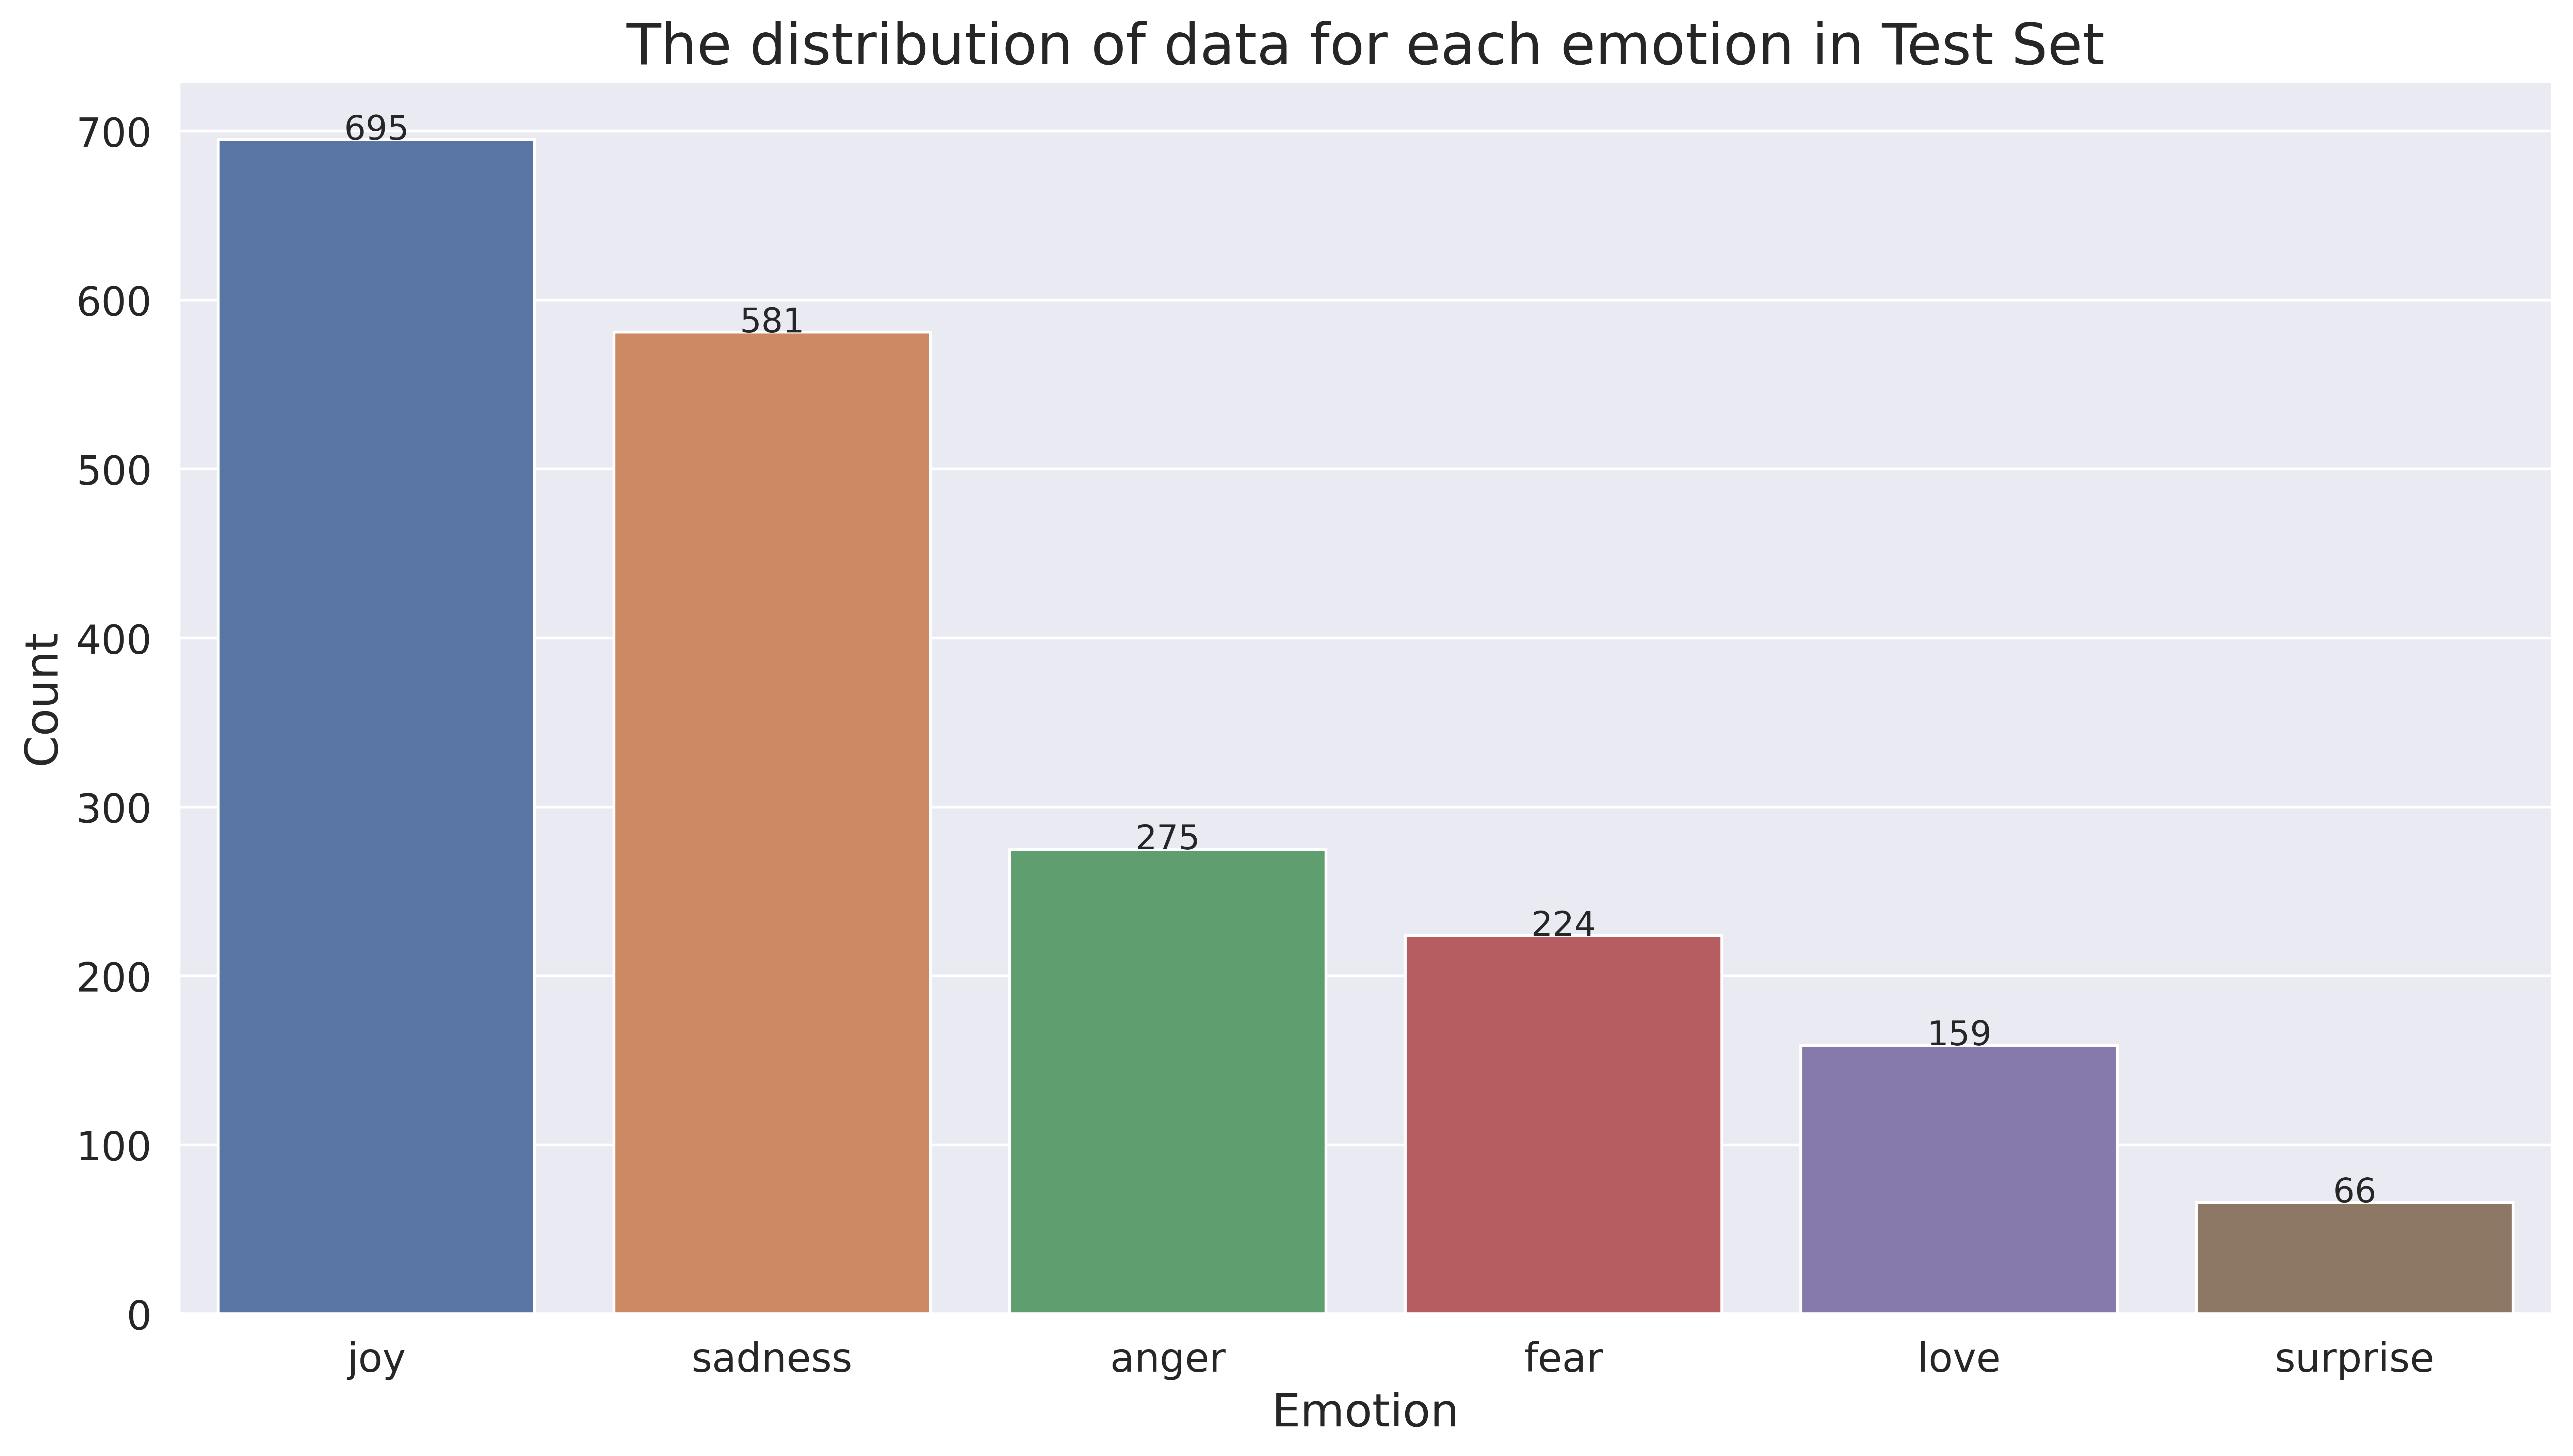

In [6]:
# Count the number of each emotion
data = [coun for coun in df_test['Emotion'].value_counts().items()]
df = pd.DataFrame(data, columns = ['Emotion', 'Count'])

# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi = 300)

# Draw a barchart to show the data
g = sns.barplot(x = 'Emotion', y = 'Count', data = df, orient = 'v')

# Show the number in the graph
for index, row in df.iterrows():
    g.text(row.name, row.Count, row.Count, ha = "center", fontsize = 12)

# Set the label and title
ax.set_xlabel('Emotion', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('The distribution of data for each emotion in Test Set', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

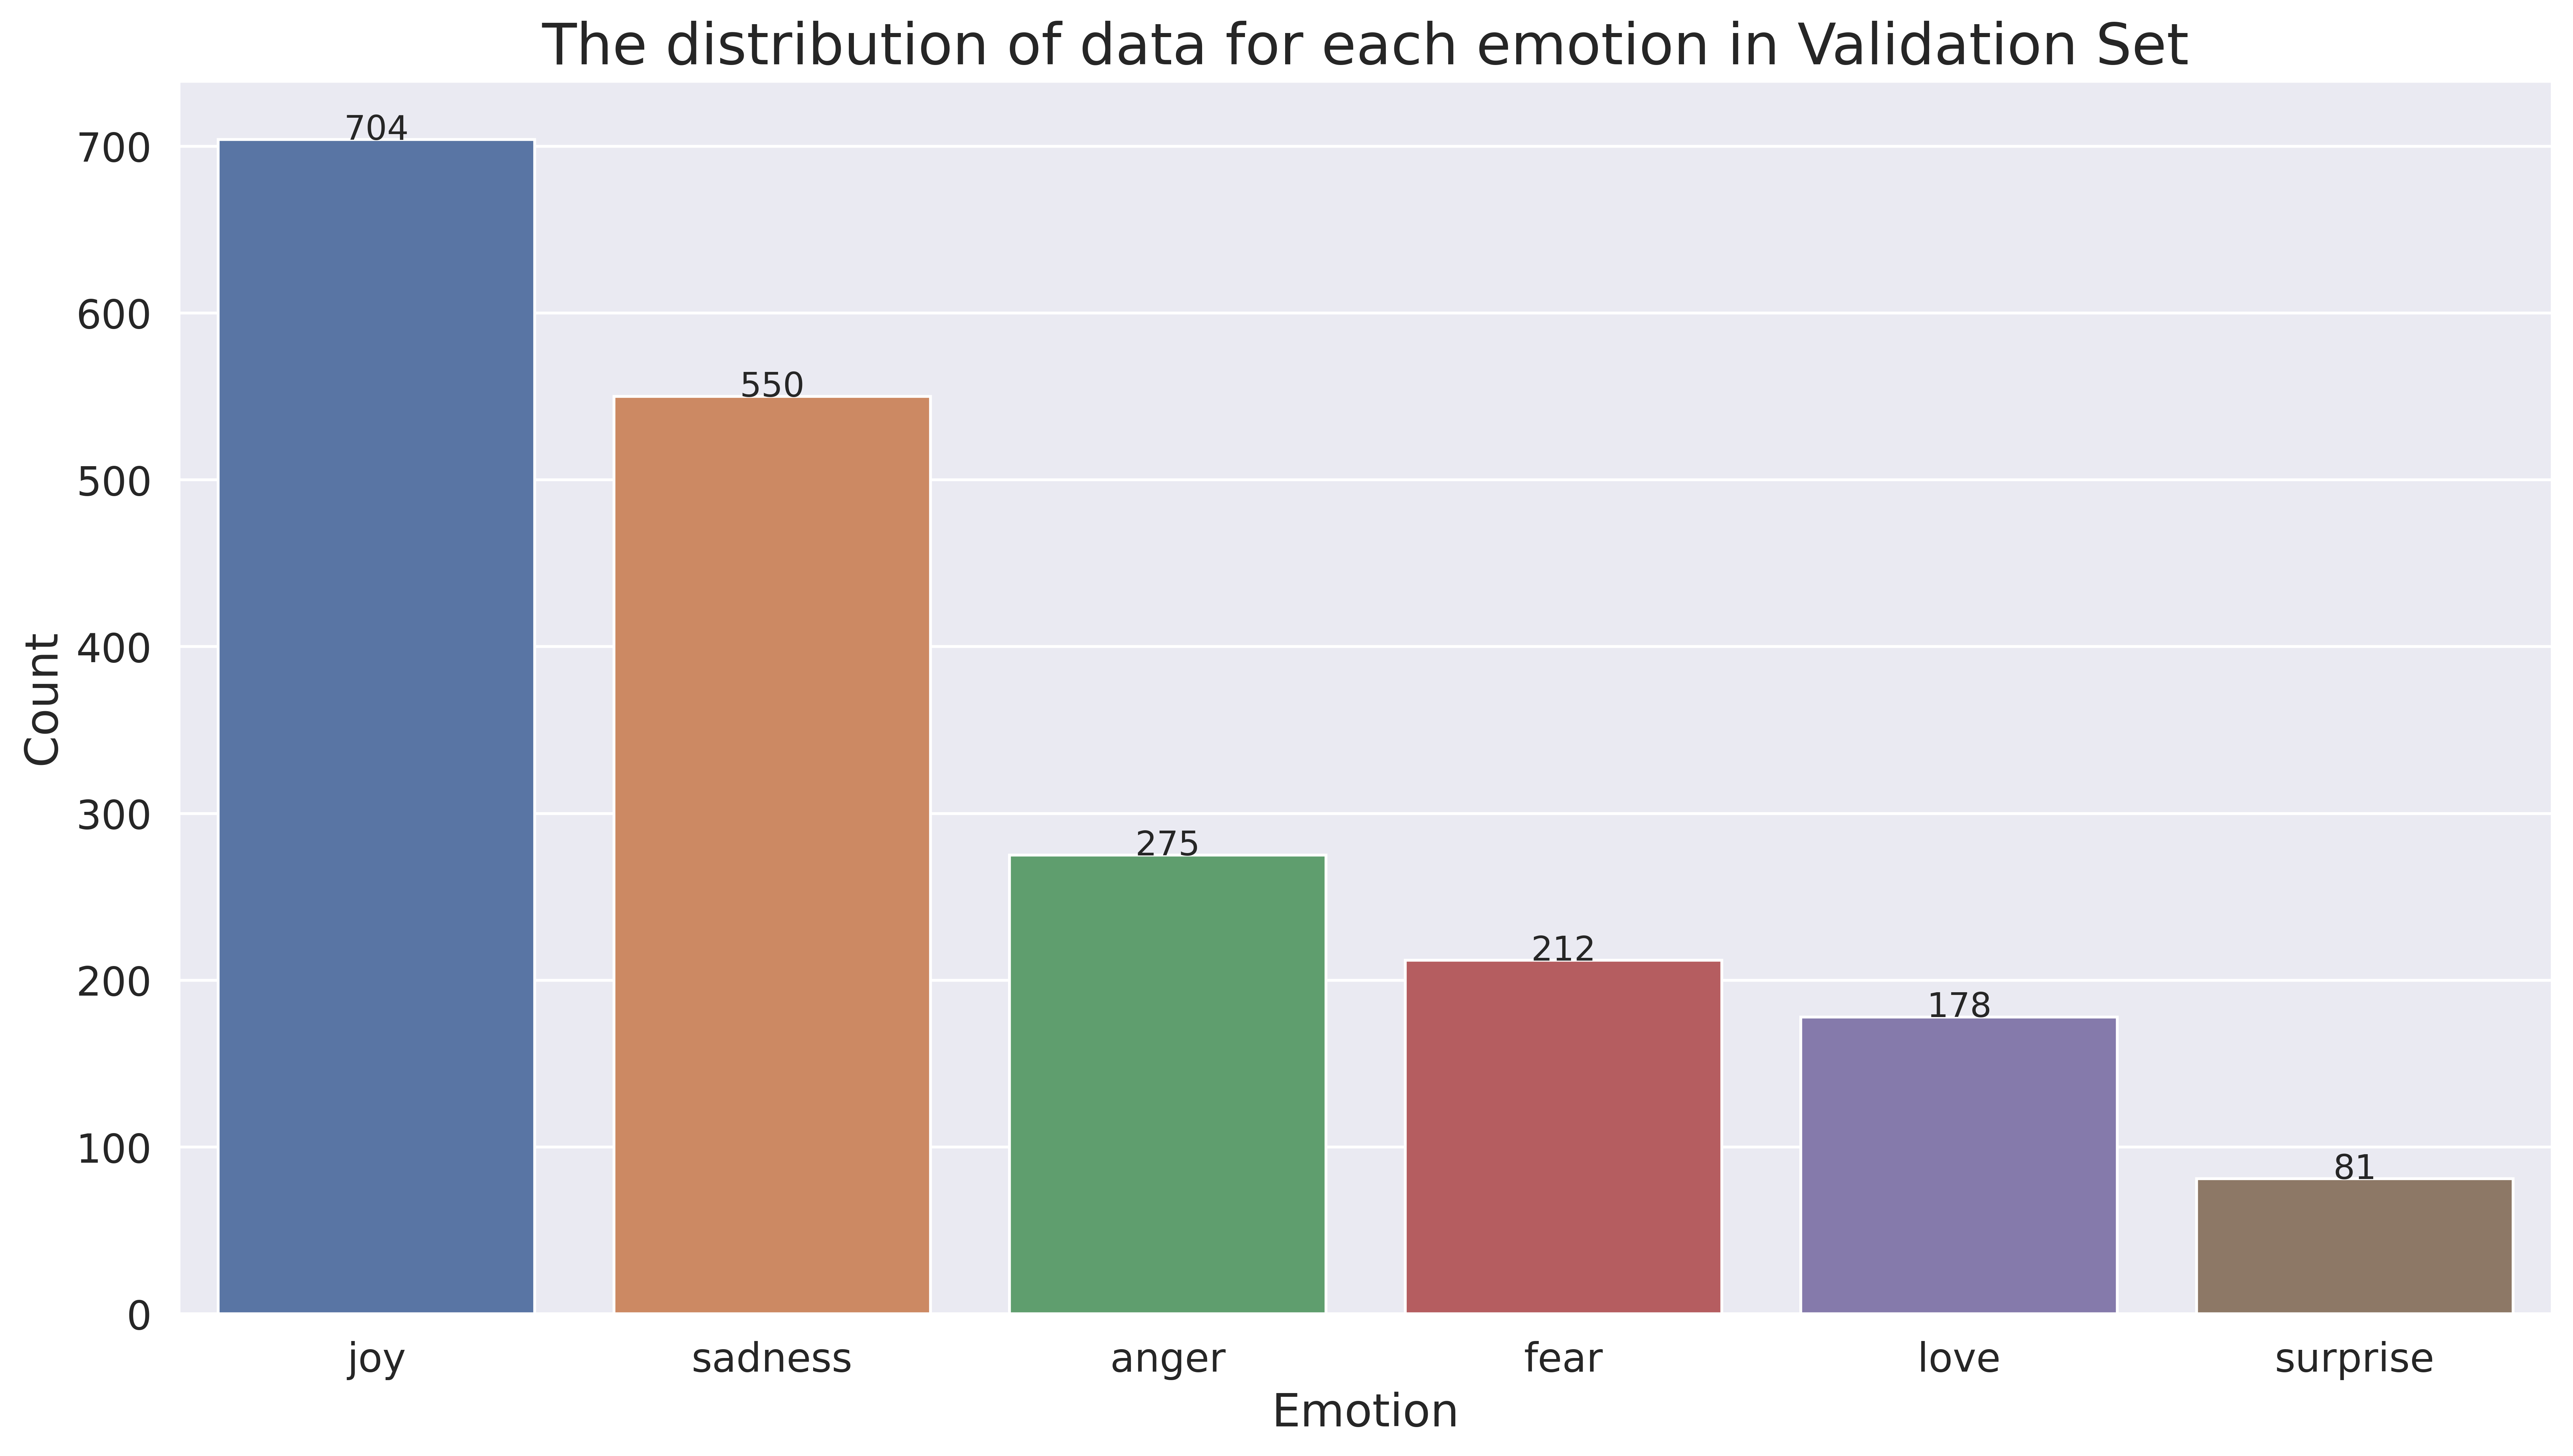

In [7]:
# Count the number of each emotion
data = [coun for coun in df_val['Emotion'].value_counts().items()]
df = pd.DataFrame(data, columns = ['Emotion', 'Count'])

# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi = 300)

# Draw a barchart to show the data
g = sns.barplot(x = 'Emotion', y = 'Count', data = df, orient = 'v')

# Show the number in the graph
for index, row in df.iterrows():
    g.text(row.name, row.Count, row.Count, ha = "center", fontsize = 12)

# Set the label and title
ax.set_xlabel('Emotion', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('The distribution of data for each emotion in Validation Set', fontsize = 20)
plt.tick_params(labelsize = 14)
plt.show()

In [8]:
# Get the length of each string
data = pd.DataFrame(df_train.Text.apply(lambda x: len(x)))
data.describe()

,Text
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


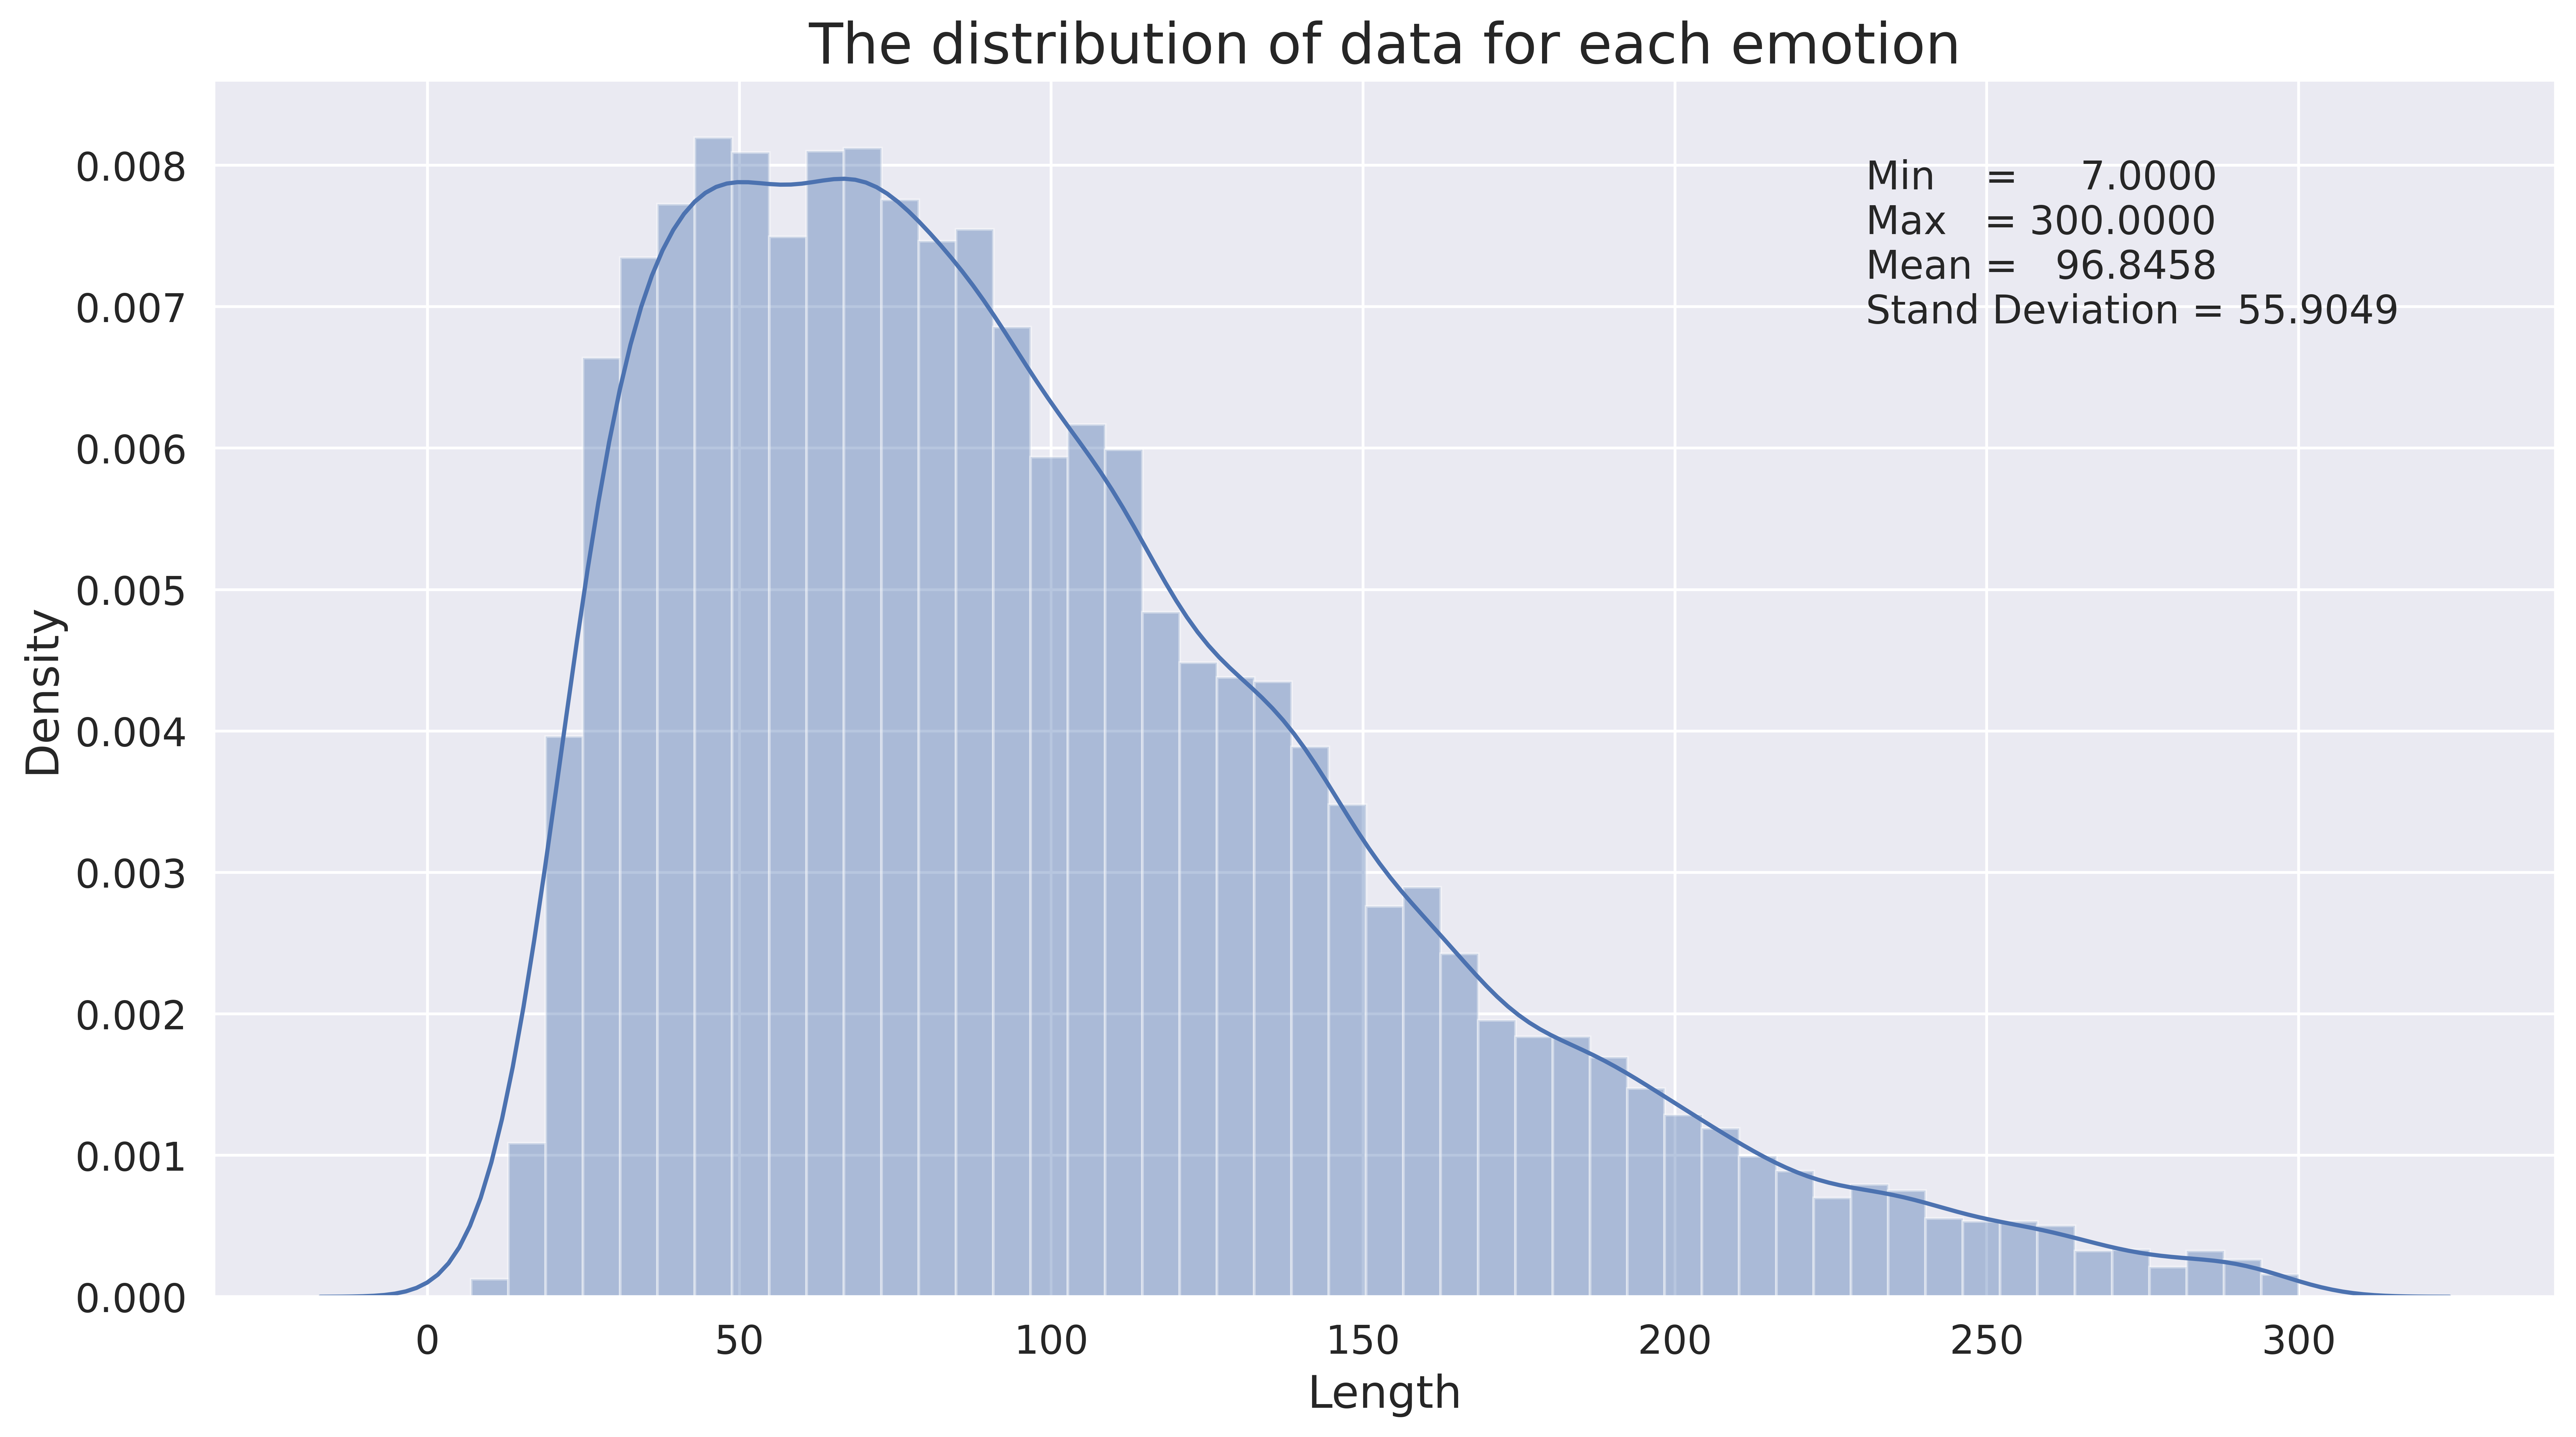

In [9]:
# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi=300)

# Draw the density figure
sns.distplot(data, rug = False, hist = True)

plt.text(
    0.7,
    0.8,
    s = " Min    =     7.0000 \n Max   = 300.0000 \n Mean =   96.8458 \n Stand Deviation = 55.9049",
    transform = ax.transAxes,
    fontsize = 14)

# Set the label and title
ax.set_xlabel('Length', fontsize = 16)
ax.set_ylabel('Density', fontsize = 16)
ax.set_title('The distribution of data for each emotion', fontsize = 20)
plt.tick_params(labelsize = 14)

# Show the figure
plt.show()

# Text Processing

In [10]:
# i'm using a text preprocessing library for this 
!pip install text_hammer 
import text_hammer as th

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 906.0 kB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.1
    Uninstalling beautifulsoup4-4.11.1:
      Successfully uninstalled beautifulsoup4-4.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.


In [11]:
%%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))  
# here we can remove stop-words but in this case removing not, and ,can change the meaning of context 

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 520 µs, sys: 0 ns, total: 520 µs
Wall time: 498 µs


In [12]:
df_cleaned_train = text_preprocessing(df_train, 'Text')

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

  0%|          | 0/16000 [00:00<?, ?it/s]

In [13]:
df_cleaned_train.head()

,Text,Emotion
0,I do not feel humiliate,sadness
1,I can go from feel so hopeless to so damn hope...,sadness
2,I m grab a minute to post I feel greedy wrong,anger
3,I am ever feel nostalgic about the fireplace I...,love
4,I am feel grouchy,anger


## Encode Labels

In [14]:
df_cleaned_train['Emotion']=df_cleaned_train.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Emotion']=df_test.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Emotion']=df_val.Emotion.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

## Tokenize words

In [15]:
num_words = 10000 # this means 10000 unique words can be taken 

tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([df_cleaned_train['Text'], df_test.Text], axis = 0)
tokenizer.fit_on_texts(df_total)

In [16]:
len(tokenizer.word_index) # this is whole unique words in our corpus
# but we are taking only 10000 words in our model

13892

In [17]:
from keras.preprocessing.sequence import pad_sequences

X_train=tokenizer.texts_to_sequences(df_cleaned_train['Text']) # this converts texts into some numeric sequences 
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post') # this makes the length of all numeric sequences equal 
X_test = tokenizer.texts_to_sequences(df_test.Text)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.Text)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(df_cleaned_train.Emotion.values)
y_test = to_categorical(df_test.Emotion.values)
y_val = to_categorical(df_val.Emotion.values)

In [19]:
print(X_train_pad.shape, X_val_pad.shape)

(16000, 300) (2000, 300)


# Build deep learning model

In [20]:
# Generate a weight matrix
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)
            
print(gensim_weight_matrix.shape)

[==================================================] 100.0% 128.1/128.1MB downloaded
(10000, 100)


In [21]:
# Embedding
max_features = num_words
maxlen = 300
embedding_size = 100

# Convolution
kernel_size = 5
filters = 128
pool_size = 4

# LSTM
lstm_output_size = 128

In [22]:
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = embedding_size, # vector space dimension
                          input_length = maxlen, # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences = False)))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')
model.summary()

2022-12-18 02:25:40.264779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 02:25:40.266009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 02:25:40.266758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-18 02:25:40.267616: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
dropout (Dropout)            (None, 300, 100)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 200)          161600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 400)          643200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300, 400)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               4

In [23]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [24]:
# Fit model
history_embedding = model.fit(X_train_pad,y_train, 
                              epochs = 25, 
                              batch_size = 120, 
                              validation_data=(X_val_pad, y_val),
                              verbose = 1, 
                              callbacks= [es, mc]  )

2022-12-18 02:25:52.804369: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-12-18 02:25:56.984198: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


134/134 [==============================] - 33s 198ms/step - loss: 1.3950 - accuracy: 0.4602 - val_loss: 1.2099 - val_accuracy: 0.5335

Epoch 00001: val_accuracy improved from -inf to 0.53350, saving model to ./model.h5
Epoch 2/25
134/134 [==============================] - 24s 180ms/step - loss: 1.0806 - accuracy: 0.5908 - val_loss: 0.8107 - val_accuracy: 0.7090

Epoch 00002: val_accuracy improved from 0.53350 to 0.70900, saving model to ./model.h5
Epoch 3/25
134/134 [==============================] - 24s 180ms/step - loss: 0.8248 - accuracy: 0.6977 - val_loss: 0.6023 - val_accuracy: 0.7770

Epoch 00003: val_accuracy improved from 0.70900 to 0.77700, saving model to ./model.h5
Epoch 4/25
134/134 [==============================] - 24s 181ms/step - loss: 0.6729 - accuracy: 0.7559 - val_loss: 0.4940 - val_accuracy: 0.8210

Epoch 00004: val_accuracy improved from 0.77700 to 0.82100, saving model to ./model.h5
Epoch 5/25
134/134 [==============================] - 24s 180ms/step - loss: 0.554

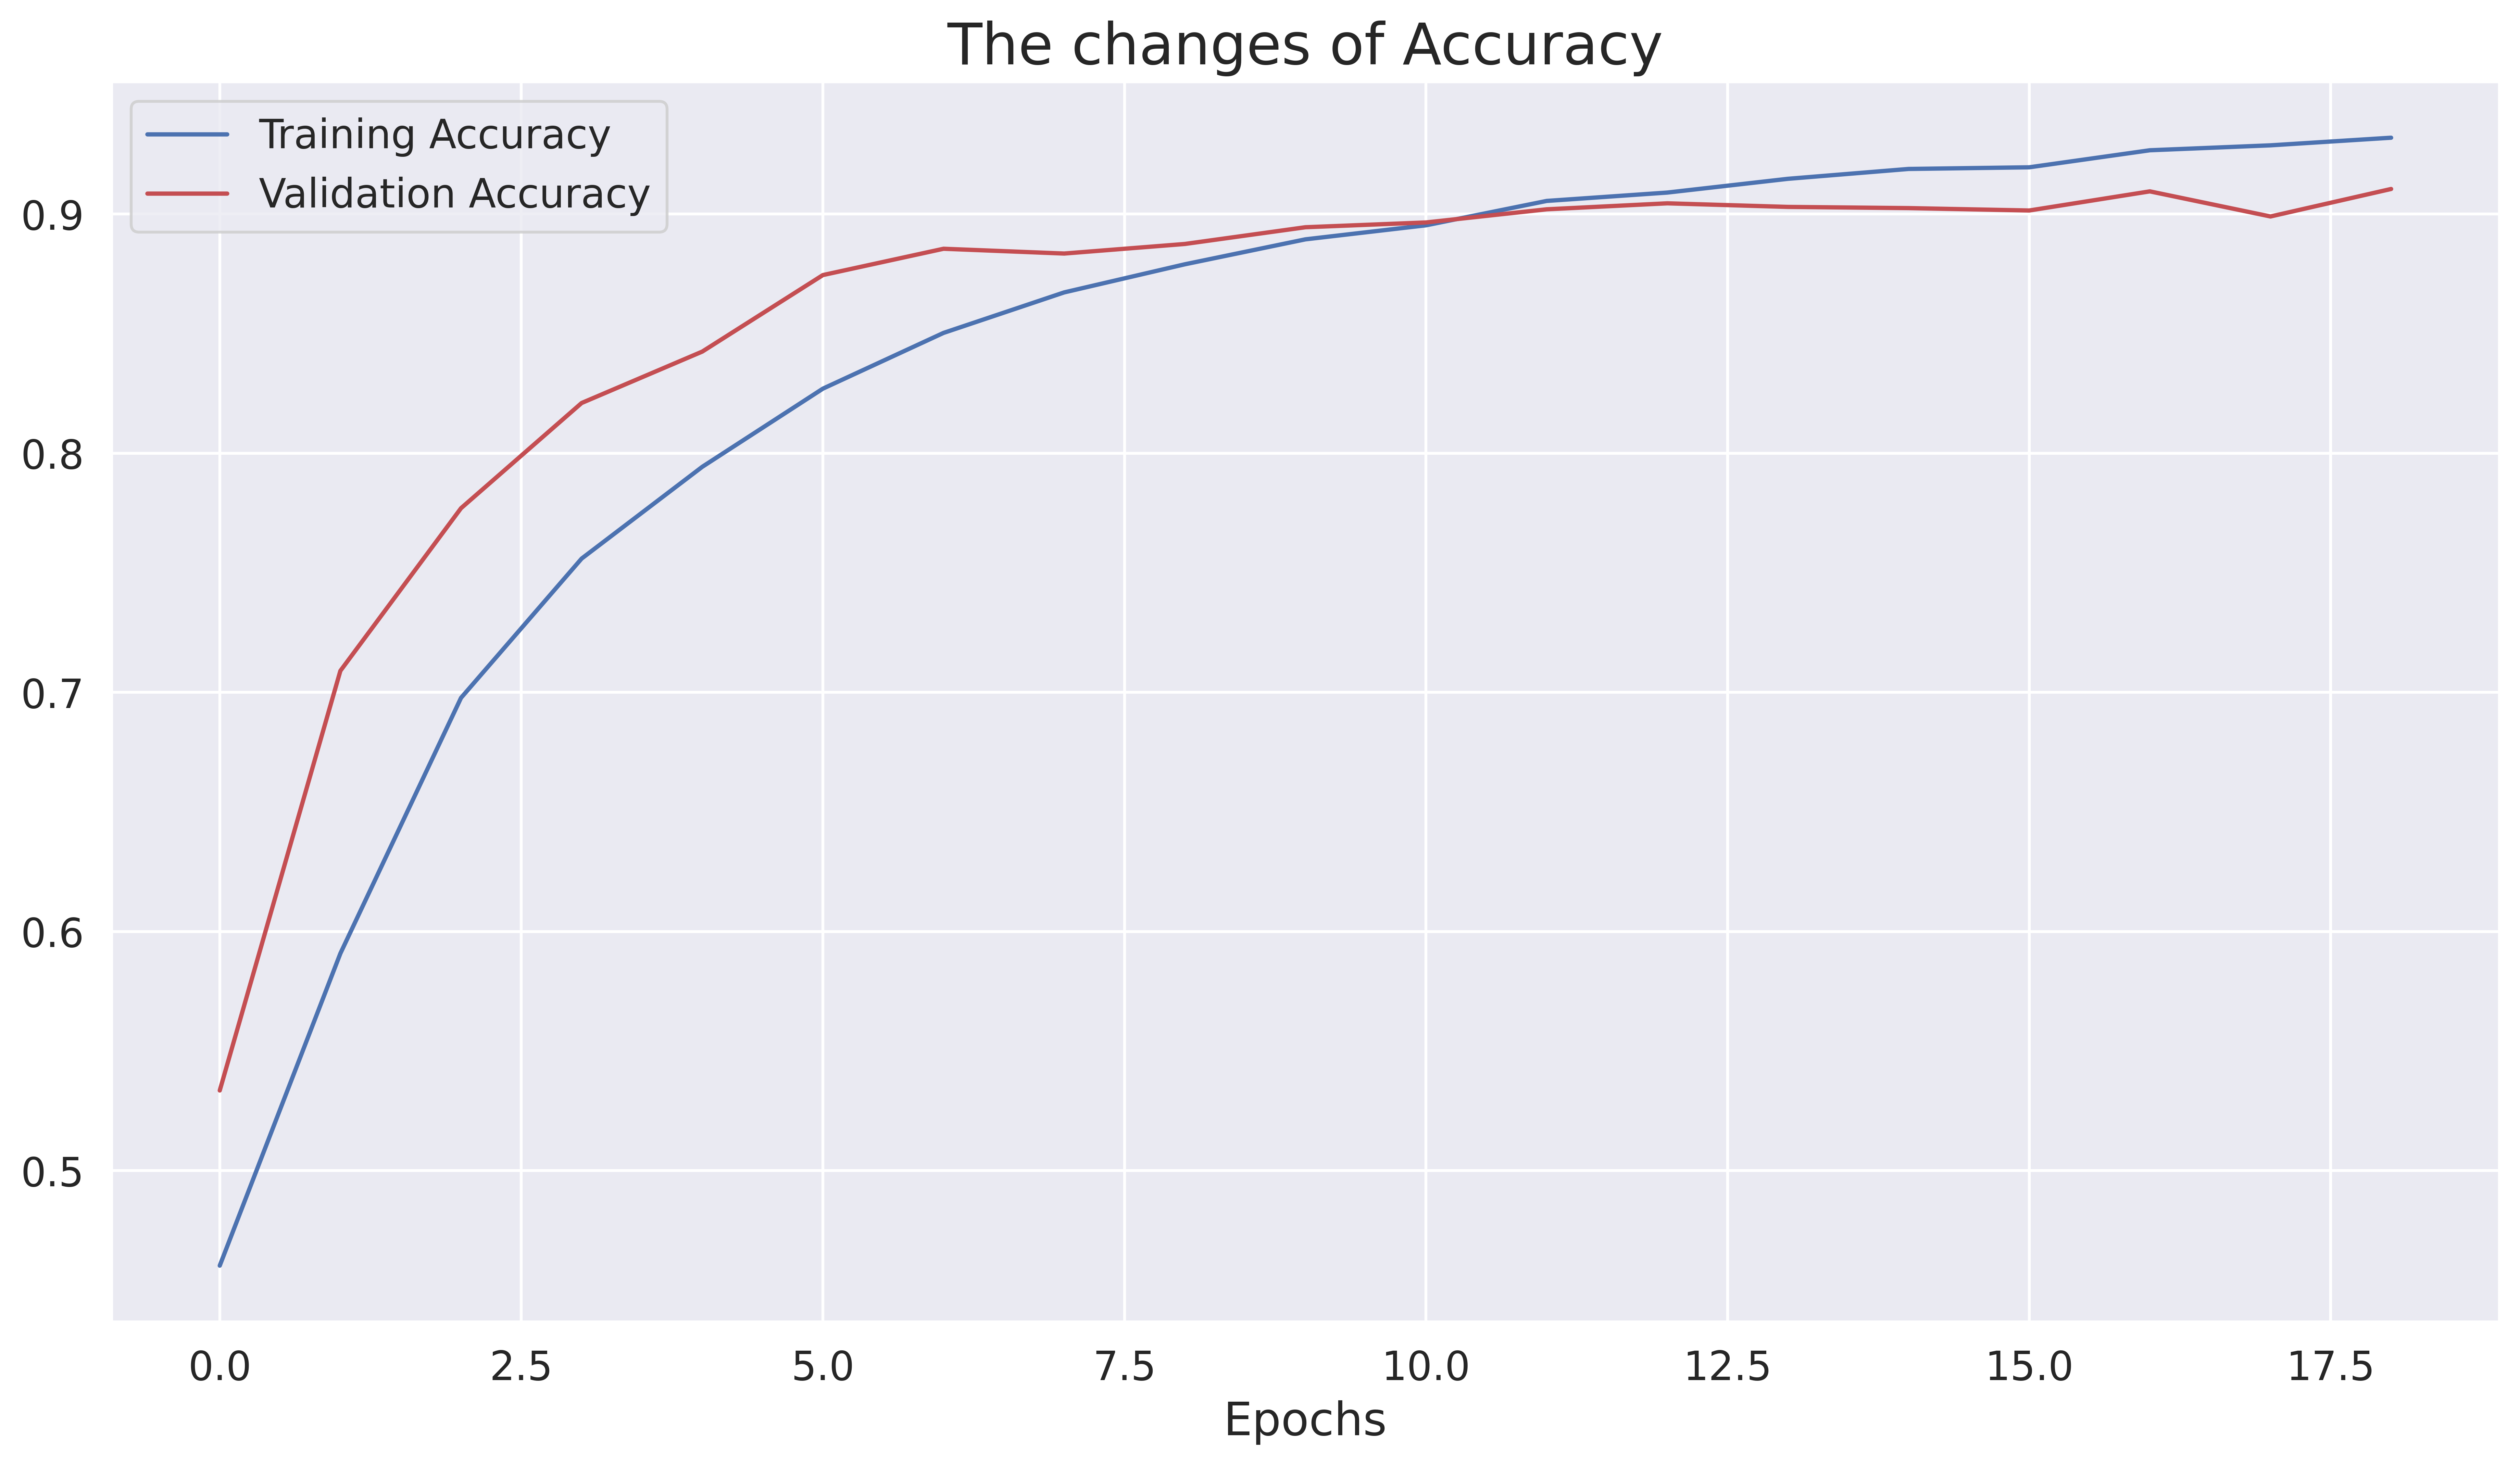

In [25]:
# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi = 300)

plt.plot(history_embedding.history['accuracy'],c = 'b',label = 'Training Accuracy')
plt.plot(history_embedding.history['val_accuracy'],c = 'r',label = 'Validation Accuracy')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xlabel('Epochs', fontsize = 16)
plt.tick_params(labelsize = 14)
plt.title('The changes of Accuracy', fontsize = 20)
plt.show()

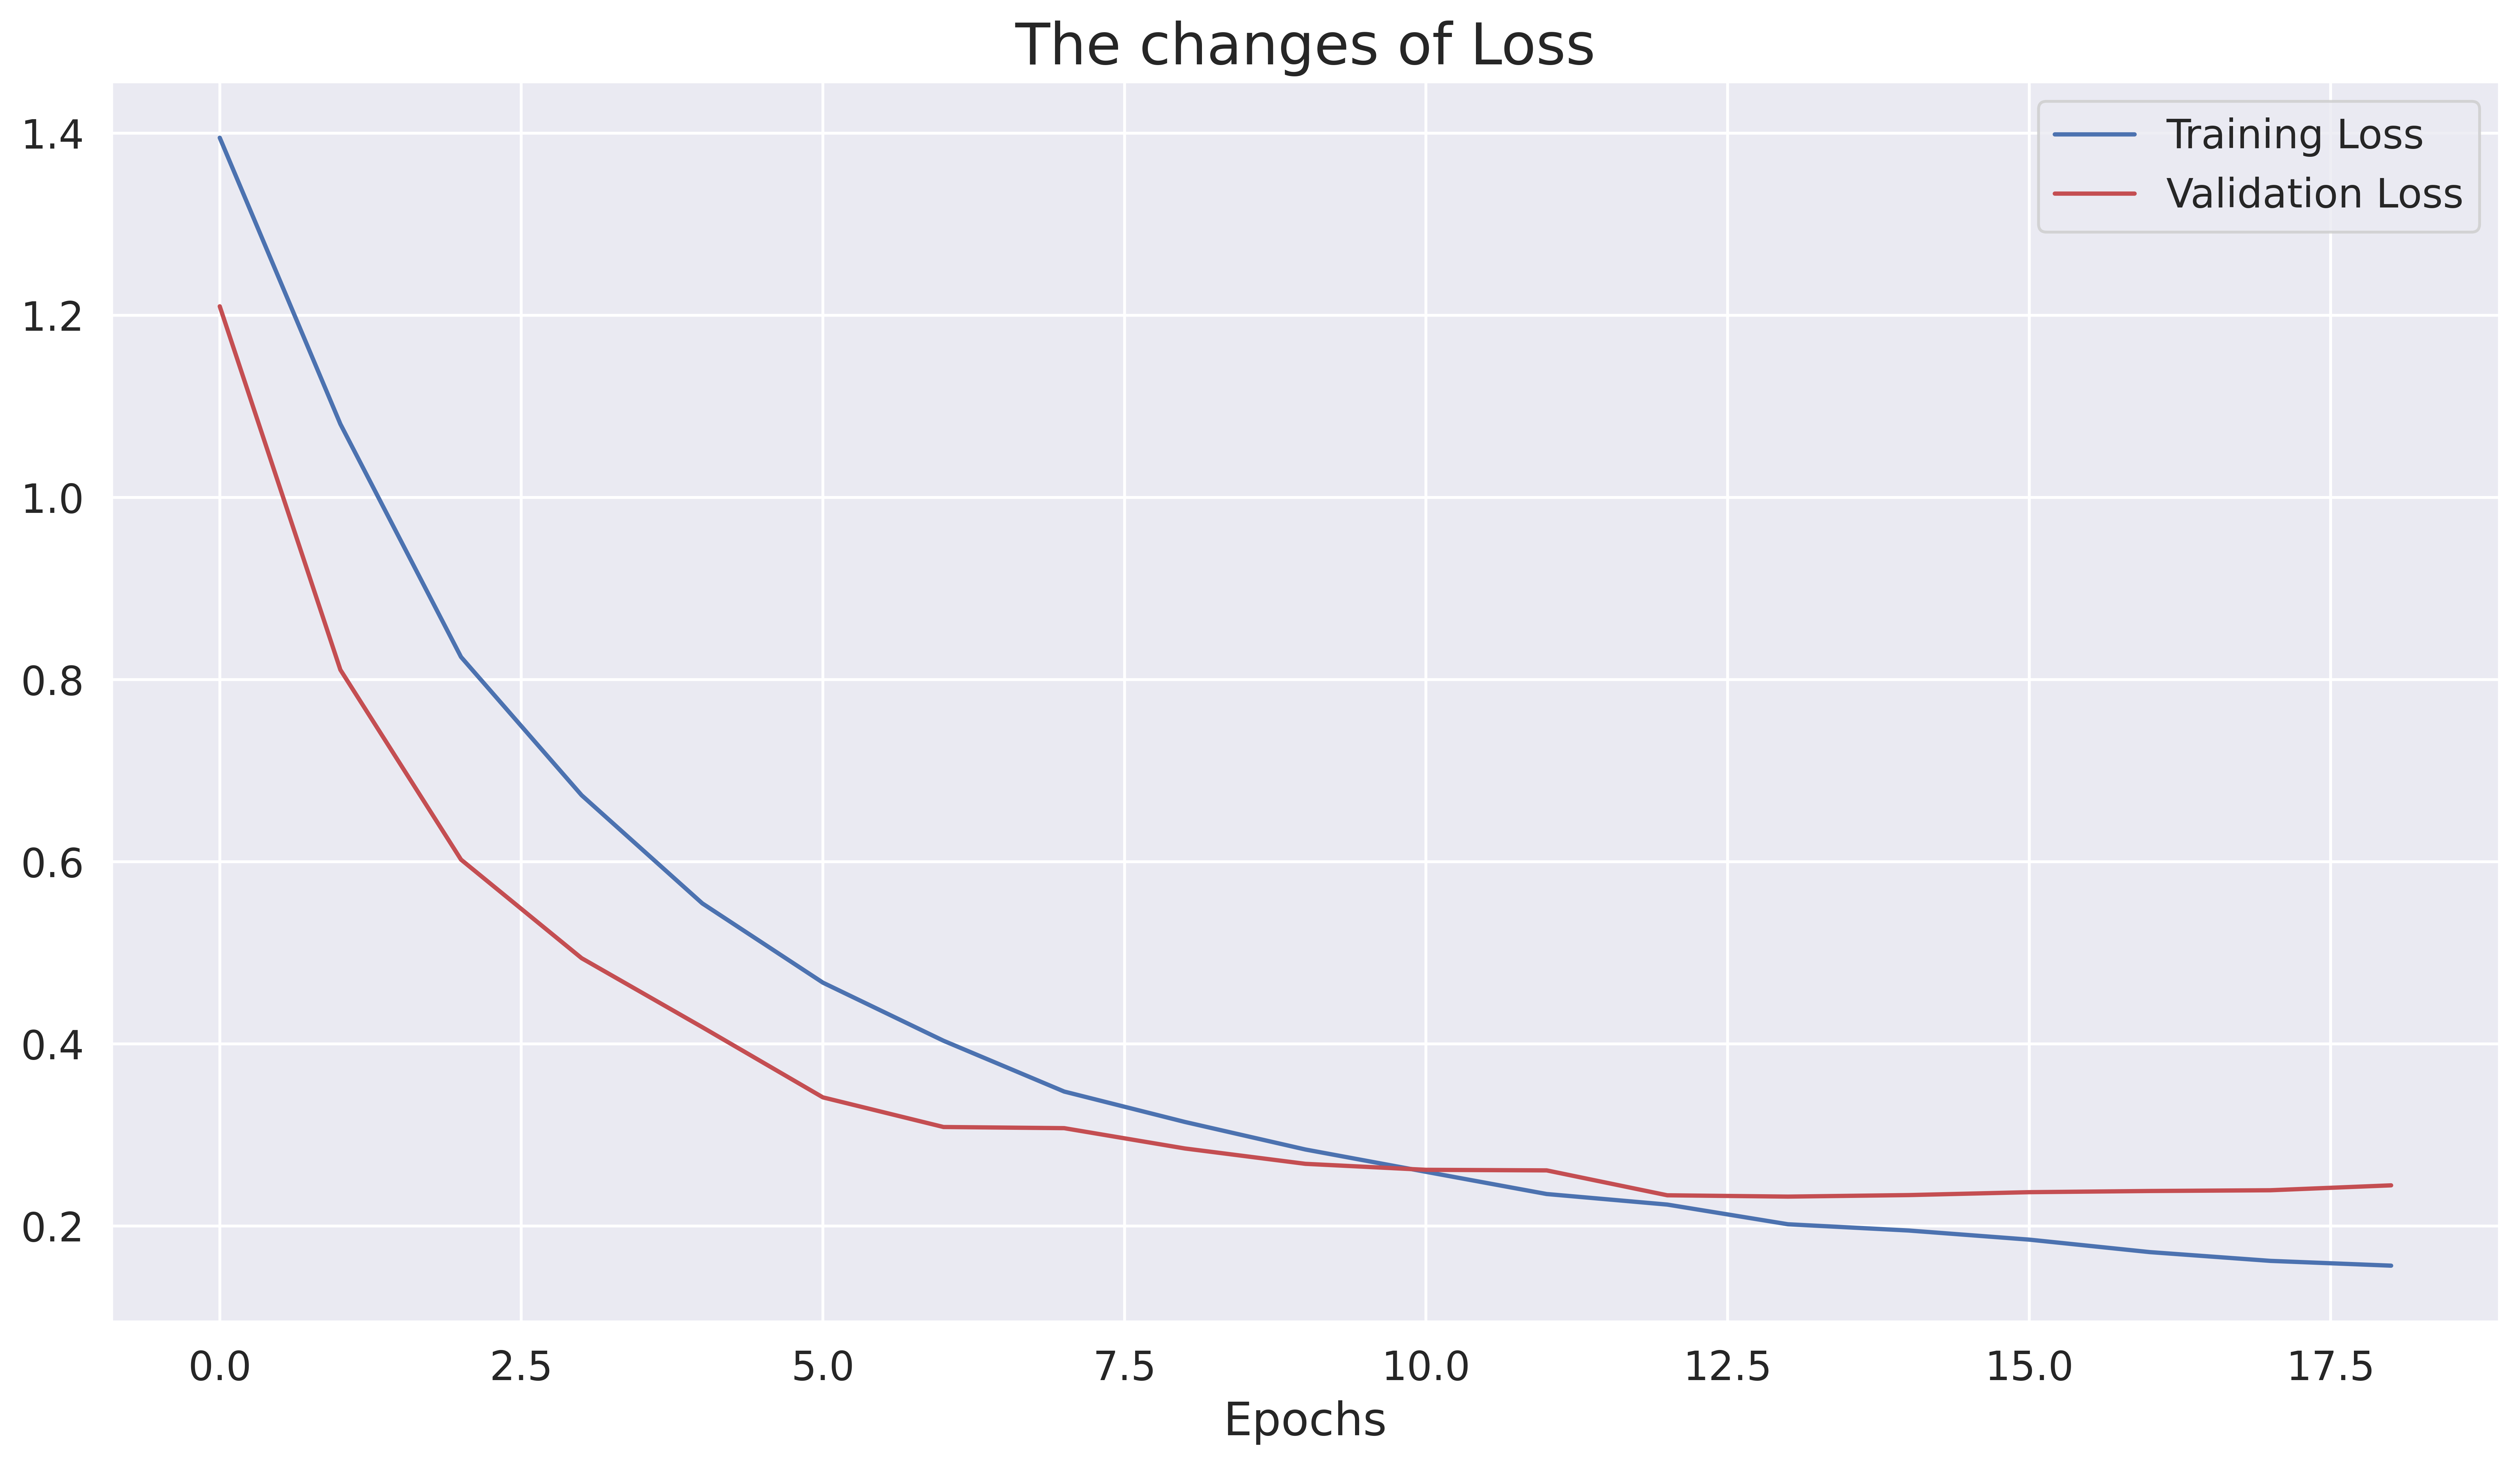

In [26]:
# Generate a figure
fig, ax = plt.subplots(figsize = (15, 8), dpi = 300)

plt.plot(history_embedding.history['loss'],c = 'b',label = 'Training Loss')
plt.plot(history_embedding.history['val_loss'],c = 'r',label = 'Validation Loss')
plt.legend(loc = 'upper right', fontsize = 14)
plt.xlabel('Epochs', fontsize = 16)
plt.tick_params(labelsize = 14)
plt.title('The changes of Loss', fontsize = 20)
plt.show()

# Predict the test set

In [27]:
model.evaluate(X_test_pad, y_test) 

63/63 [==============================] - 3s 48ms/step - loss: 0.2456 - accuracy: 0.8975


[0.24558305740356445, 0.8974999785423279]

# Define the function used to predict other input

In [28]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [29]:
def predict(sentence):
    
    # Define a empty list to store the input sentence
    sentence_lst = []
    sentence_lst.append(sentence)
    
    # Tokenize word
    sentence_seq = tokenizer.texts_to_sequences(sentence_lst)
    
    # Padding the sequence into length = 300
    sentence_padded = pad_sequences(sentence_seq,maxlen=300,padding='post')
    
    # Predict and decode the result
    pred = np.argmax(model.predict(sentence_padded), axis = 1)
    ans = get_key(pred)
    
    return ans

In [30]:
# predict(str(input('Please Enter A Sentence: ')))

# Read the dataset need to predict

In [31]:
data = pd.read_csv('/kaggle/input/russiaukraine-conflict-twitter-dataset/tweets.csv', # Change the path into you input
                       encoding = 'utf-8')
data = data[data['Language'] == 'en'].reset_index(drop = True)
data

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25710,2022-03-27 23:59:21+00:00,1508232236985892869,#Biden Confirms Why the #US #Needed This #War:...,OccupySchagen,https://twitter.com/OccupySchagen/status/15082...,https://twitter.com/OccupySchagen,['https://consortiumnews.com/2022/03/27/can-ru...,['https://t.co/HMtKuuaKE1'],0.0,1.0,3.0,0,1508232236985892869,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#Biden', '#US', '#Needed', '#War:', '#Ultima...",13.0
25711,2022-03-27 23:59:26+00:00,1508232259266043905,Remember this?\nSviatlana #tsikhanouskaya: You...,Sasha52114265,https://twitter.com/Sasha52114265/status/15082...,https://twitter.com/Sasha52114265,['https://youtu.be/nm8yY8ws-VY'],['https://t.co/zO7rvaWBpc'],0.0,0.0,0.0,0,1508232259266043905,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,"[User(username='YouTube', id=10228272, display...","['#tsikhanouskaya:', '#putin', '#PutinIsaWarCr...",5.0
25712,2022-03-27 23:59:26+00:00,1508232258037112834,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,6.0,0,1508232258037112834,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0
25713,2022-03-27 23:59:44+00:00,1508232332289126401,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0.0,0.0,0.0,0,150823233228912

In [32]:
df = data[['Datetime', 'Text']]
df

,Datetime,Text
0,2022-02-24 03:12:47+00:00,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,2022-02-24 03:18:54+00:00,🇺🇦 Kharkiv is officially being struck by major...
2,2022-02-24 03:22:42+00:00,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,2022-02-24 03:25:36+00:00,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,2022-02-24 03:27:28+00:00,🇺🇦 Damage caused by strike in Kharkiv... #Russ...
...,...,...
25710,2022-03-27 23:59:21+00:00,#Biden Confirms Why the #US #Needed This #War:...
25711,2022-03-27 23:59:26+00:00,Remember this?\nSviatlana #tsikhanouskaya: You...
25712,2022-03-27 23:59:26+00:00,Russia’s mass media and telecommunications wat...
25713,2022-03-27 23:59:44+00:00,"Watch: amid war ruins in #Ukraine, unbowed cla..."


In [33]:
pred = []
for i in range(len(df)):
    temp = predict(df['Text'][i])
    pred.append(temp)
df['Label'] = pred
df.to_csv('Tweets.csv', encoding = 'utf-8')
df

,Datetime,Text,Label
0,2022-02-24 03:12:47+00:00,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,anger
1,2022-02-24 03:18:54+00:00,🇺🇦 Kharkiv is officially being struck by major...,anger
2,2022-02-24 03:22:42+00:00,🇺🇦 More angles on that strike in Kharkiv. #Rus...,anger
3,2022-02-24 03:25:36+00:00,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,anger
4,2022-02-24 03:27:28+00:00,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,anger
...,...,...,...
25710,2022-03-27 23:59:21+00:00,#Biden Confirms Why the #US #Needed This #War:...,joy
25711,2022-03-27 23:59:26+00:00,Remember this?\nSviatlana #tsikhanouskaya: You...,anger
25712,2022-03-27 23:59:26+00:00,Russia’s mass media and telecommunications wat...,anger
25713,2022-03-27 23:59:44+00:00,"Watch: amid war ruins in #Ukraine, unbowed cla...",anger
